In [79]:
import pandas as pd
from matplotlib import pyplot
pd.set_option('display.max_rows', 500)

In [2]:
PATH = './datasets/data_immobilier.csv'

In [3]:
dataset = pd.read_csv(PATH)

In [77]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [76]:
dataset.sample(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
671,672,70,RH,54.0,6629,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,103600
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1368,1369,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,144000
1192,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
361,362,50,RL,NaN,9144,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,145000
1436,1437,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,120500
1228,1229,120,RL,65.0,8769,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,New,Partial,367294
1343,1344,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,177000
1026,1027,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,167500


In [7]:
dataset.shape

(1460, 81)

In [43]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [12]:
dataset.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [18]:
for col in list(dataset):
    print(col)
    print(dataset[col].unique())

Id
[   1    2    3 ... 1458 1459 1460]
MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 

## Preprocessing

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
df = dataset.copy()

In [52]:
LE = LabelEncoder()

In [71]:
for col in df.columns: 
    if df[col].dtypes == 'O': 
        df[col] = df[col].astype('category')
        df[col] = LE.fit_transform(df[col])
    df = df.dropna(subset=[col])

In [66]:
df.sample(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
13,14,20,3,91.0,10652,1,2,0,3,0,...,0,3,4,4,0,8,2007,6,5,279500
216,217,20,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,4,2008,8,4,210000
66,67,20,3,NaN,19900,1,2,3,3,0,...,0,3,4,4,0,7,2010,8,4,180000
415,416,20,3,73.0,8899,1,2,0,3,0,...,0,3,4,4,0,8,2007,6,5,181134
1084,1085,60,3,NaN,13031,1,2,1,3,0,...,0,3,4,4,0,7,2006,8,4,187500
818,819,80,3,80.0,8816,1,2,3,3,0,...,0,3,2,4,0,6,2010,8,4,155000
1273,1274,80,3,124.0,11512,1,2,0,3,0,...,0,3,0,4,0,5,2008,8,4,177000
255,256,60,3,66.0,8738,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,4,230000
8,9,50,4,51.0,6120,1,2,3,3,0,...,0,3,4,4,0,4,2008,8,0,129900
923,924,120,3,50.0,8012,1,2,3,3,0,...,0,3,4,4,0,7,2008,8,4,193000


## Models 

In [67]:
from sklearn.linear_model import LinearRegression

In [73]:
# train_test_split
X_train = df.sample(frac = 0.8, random_state = 25)
y_train = X_train["SalePrice"]
X_train = X_train.drop(["SalePrice"], axis=1)


X_test = df.drop(X_train.index)
y_test = X_test["SalePrice"]
X_test = X_test.drop(["SalePrice"], axis=1)

In [74]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 80), (897,), (224, 80), (224,))

### Useful methods

In [128]:
# Calculate accuracy
def accuracy(prediction, expected): 
    count = 0 
    for i in range(len(expected)): 
        print(f'Actual: {int(round(prediction[i]))} - Expected: {expected[i]} - Difference : {expected[i] - int(round(prediction[i]))}', flush=True)
        if int(round(prediction[i])) == expected[i]: 
            count += 1
    return (count/len(expected))*100

### Linear regression

In [75]:
# Model 1 : Linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
importance = lr.coef_

0.8858130280842116

Feature: 0, Score: -0.1587156473287888%
Feature: 1, Score: -63.34724603890328%
Feature: 2, Score: -724.3631111777954%
Feature: 3, Score: 42.53220415936214%
Feature: 4, Score: 0.5573461818321732%
Feature: 5, Score: 63021.98682237238%
Feature: 6, Score: 5009.687185294119%
Feature: 7, Score: -14.902372696935664%
Feature: 8, Score: 622.7897705741188%
Feature: 9, Score: -4.16048351326026e-09%
Feature: 10, Score: 202.20727274544674%
Feature: 11, Score: 3047.9251075152083%
Feature: 12, Score: 471.95131287772466%
Feature: 13, Score: -1605.9276135976195%
Feature: 14, Score: -15939.439395392077%
Feature: 15, Score: -2041.3550987623744%
Feature: 16, Score: -248.9843605317273%
Feature: 17, Score: 9846.63938031643%
Feature: 18, Score: 4463.11026163088%
Feature: 19, Score: 213.99986901017166%
Feature: 20, Score: 86.46936443459292%
Feature: 21, Score: 938.7817811130155%
Feature: 22, Score: -15.761783352546217%
Feature: 23, Score: -516.7660800071162%
Feature: 24, Score: 471.4087195835659%
Feature: 25,

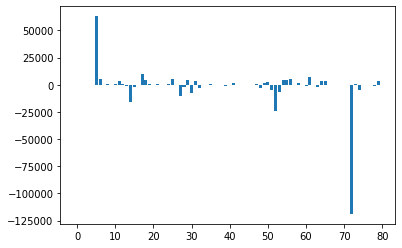

In [82]:
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i}, Score: {v}%')

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [84]:
lr_pred = lr.predict(X_test)

In [129]:
accuracy(lr_pred.tolist(), y_test.tolist())

Actual: 215956 - Expected: 208500 - Difference : -7456
Actual: 125617 - Expected: 118000 - Difference : -7617
Actual: 158730 - Expected: 159000 - Difference : 270
Actual: 268487 - Expected: 256300 - Difference : -12187
Actual: 296509 - Expected: 306000 - Difference : 9491
Actual: 67969 - Expected: 40000 - Difference : -27969
Actual: 126992 - Expected: 109000 - Difference : -17992
Actual: 167982 - Expected: 170000 - Difference : 2018
Actual: 66909 - Expected: 110000 - Difference : 43091
Actual: 360188 - Expected: 385000 - Difference : 24812
Actual: 187032 - Expected: 180500 - Difference : -6532
Actual: 93694 - Expected: 101000 - Difference : 7306
Actual: 161388 - Expected: 140000 - Difference : -21388
Actual: 73159 - Expected: 80000 - Difference : 6841
Actual: 78180 - Expected: 91000 - Difference : 12820
Actual: 227646 - Expected: 193500 - Difference : -34146
Actual: 244330 - Expected: 245000 - Difference : 670
Actual: 84482 - Expected: 83000 - Difference : -1482
Actual: 181103 - Expect

Actual: 108030 - Expected: 119900 - Difference : 11870
Actual: 184420 - Expected: 155000 - Difference : -29420
Actual: 107534 - Expected: 99500 - Difference : -8034
Actual: 152025 - Expected: 117000 - Difference : -35025
Actual: 216057 - Expected: 187000 - Difference : -29057
Actual: 55306 - Expected: 91000 - Difference : 35694
Actual: 65997 - Expected: 88000 - Difference : 22003
Actual: 258392 - Expected: 240000 - Difference : -18392
Actual: 117175 - Expected: 135000 - Difference : 17825
Actual: 118602 - Expected: 119200 - Difference : 598
Actual: 216440 - Expected: 227000 - Difference : 10560
Actual: 222884 - Expected: 203000 - Difference : -19884
Actual: 109404 - Expected: 112500 - Difference : 3096
Actual: 326144 - Expected: 315500 - Difference : -10644
Actual: 137112 - Expected: 115000 - Difference : -22112
Actual: 196211 - Expected: 176485 - Difference : -19726
Actual: 365527 - Expected: 335000 - Difference : -30527
Actual: 170909 - Expected: 219500 - Difference : 48591
Actual: 1

0.0

### Polynomial regression

### Random Forests

### XGBoost

### Stochastic Gradient Descent